## Autoregression

Autoregression modeling is a modeling technique used for time series data that assumes linear continuation of the series so that previous values in the time series can be used to predict futures values.  Some of you may be thinking that this sounds just like a linear regression – it sure does sound that way and is – in general – the same idea with additional features of the model that includes the idea of ‘lag variables’.

y = a + b1*X(t-1) + b2*X(t-2) + b3*X(t-3)

where a, b1, b2 and b3 are variables found during the training of the model and X(t-1), X(t-2) and X(t-3) are input variables at previous times within the data set.

### Forecasting Time Series with Autoregression

For this type of modeling, you need to be aware of the assumptions that are made prior to beginning working with data and autoregression modeling.

Assumptions:

    The previous time step(s) is useful in predicting the value at the next time step (dependance between values)
    Your data is stationary. A time series is stationary if is mean (and/or variance) is constant over time. There are other statistical properties to look at as well, but looking at the mean is usually the fastest/easiest.

If your time series data isn’t stationary, you’ll need to make it that way with some form of trend and seasonality removal (we’ll talk about that shortly).   If your time series data values are independent of each other, autoregression isn’t going to be a good forecasting method for that series.

<AxesSubplot:xlabel='date'>

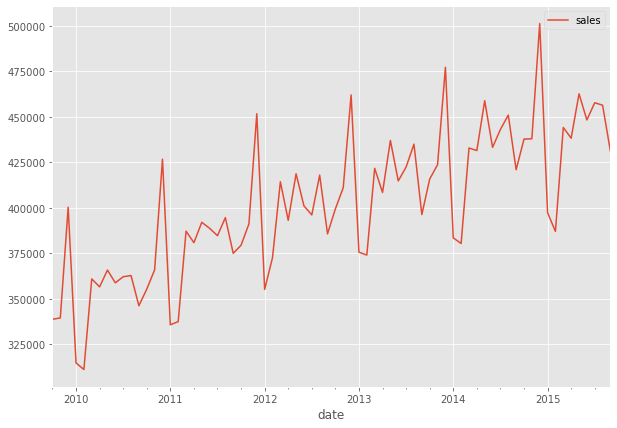

In [4]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.figsize']=(10,7)
plt.style.use('ggplot')

df = pd.read_csv('../Data/retail_sales.csv',index_col='date',parse_dates=["date"])
df.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

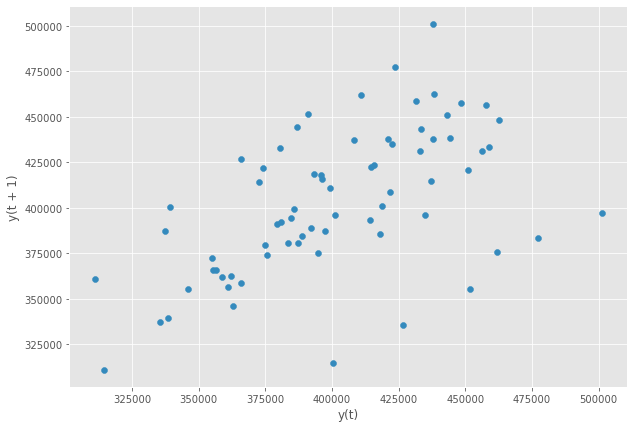

In [5]:
pd.plotting.lag_plot(df['sales'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

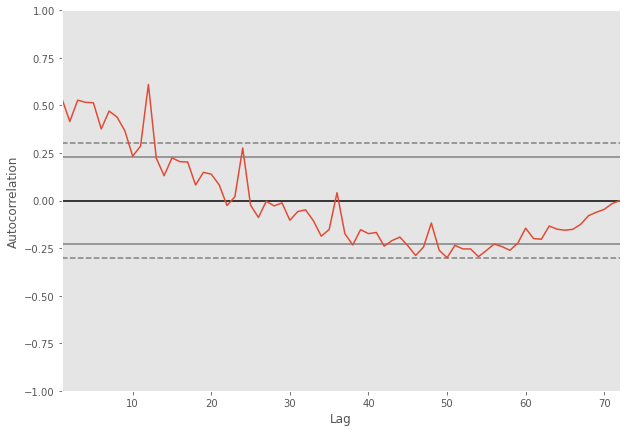

In [7]:
pd.plotting.autocorrelation_plot(df['sales'])

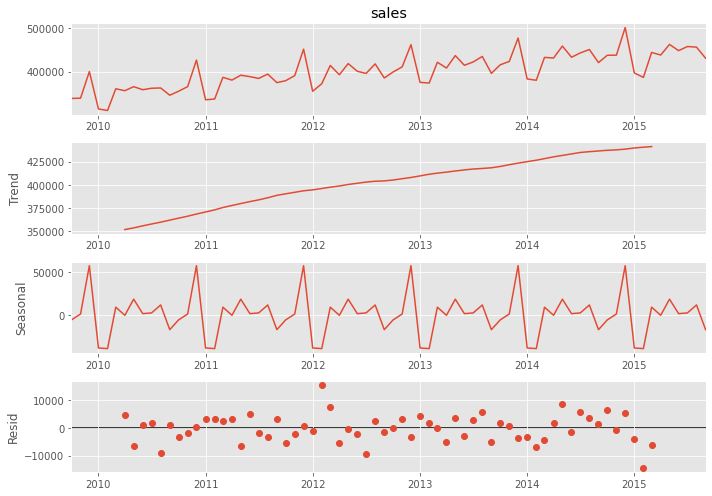

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['sales'], model='additive')
x = decomposed.plot() 

In [12]:
df['st_sales']=df['sales'].diff()

<AxesSubplot:xlabel='date'>

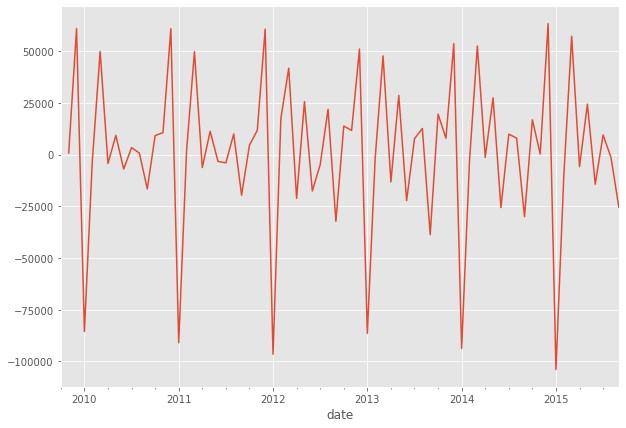

In [13]:
df.st_sales.plot()

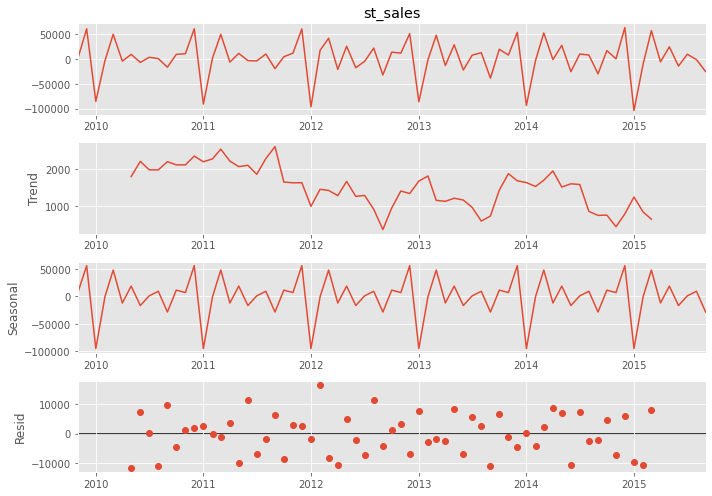

In [15]:
decomposed = seasonal_decompose(df['st_sales'].dropna(), model='additive')
y = decomposed.plot() 

In [18]:

from statsmodels.tsa.ar_model import AR
X = df['st_sales'].dropna()
model = AR(X)
model_fitted = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [19]:
print('The lag value chose is: %s' % model_fitted.k_ar)

print('The coefficients of the model are:\n %s' % model_fitted.params)

The lag value chose is: 11
The coefficients of the model are:
 const           15027.727453
L1.st_sales        -0.943287
L2.st_sales        -0.864018
L3.st_sales        -0.776996
L4.st_sales        -0.728419
L5.st_sales        -0.650647
L6.st_sales        -0.661094
L7.st_sales        -0.685425
L8.st_sales        -0.759637
L9.st_sales        -0.868345
L10.st_sales       -0.973031
L11.st_sales       -0.999687
dtype: float64


In [20]:
pred=model_fitted.predict()

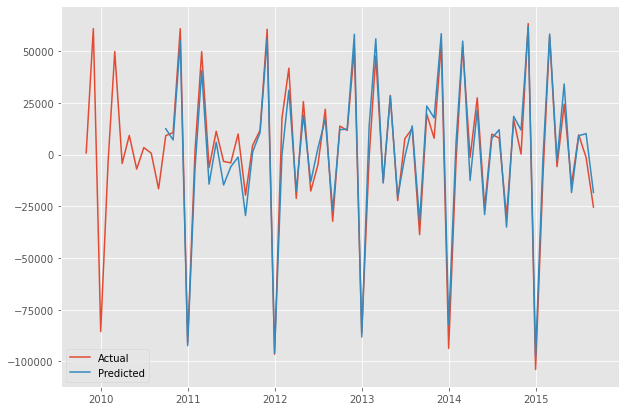

In [26]:
plt.plot(X,label="Actual")
plt.plot(pred,label="Predicted")
plt.legend()

In [29]:
residual=model_fitted.resid

<AxesSubplot:xlabel='date'>

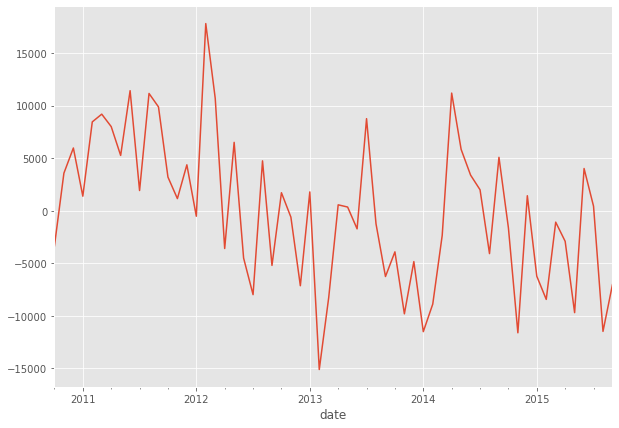

In [30]:
residual.plot()

<AxesSubplot:ylabel='Density'>

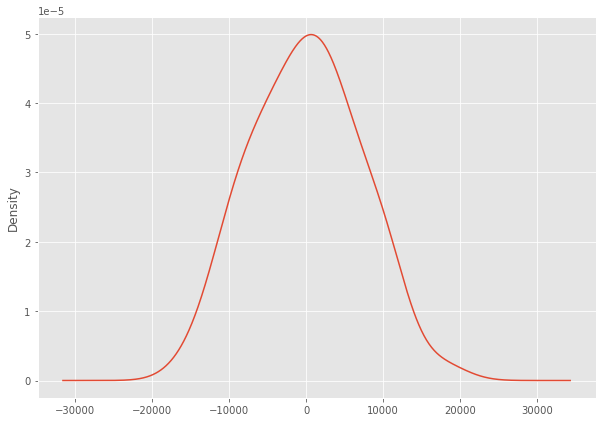

In [31]:
residual.plot(kind="kde")